<a href="https://colab.research.google.com/github/FaragoFa/Materia-de-aprendizaje/blob/master/ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importo librerias

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd
import numpy as np

Genero y acomodo el dataset

In [93]:
x = random.normal(loc=40, scale=4, size=50) #Creo dataset de 50 mandarinas (Media = 40, Desvio Estandar=4)
y = random.normal(loc=55, scale=5, size=50) #Creo dataset de 50 naranjas (target)(Media = 55, Desvio Estandar=5)

#Transpongo la fila y creo una columna nueva que otorgue 1 a todas las naranjas
dfy = pd.DataFrame([y])
dfy = dfy.transpose()
dfy=dfy.assign(Naranjas = 1)
dfy.columns = ['Tamaño', 'Naranjas']

#Transpongo la fila y creo una columna nueva que otorgue 0 a todas las mandarinas
dfx = pd.DataFrame([x])
dfx = dfx.transpose()
dfx=dfx.assign(Naranjas = 0)
dfx.columns = ['Tamaño', 'Naranjas']

#Uno mandarinas con naranjas
df = pd.concat([dfx, dfy])

#data_X, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

Muestro el DataFrame

,Tamaño,Naranjas
0,42.278533,0
1,41.448375,0
2,46.842669,0
3,35.699918,0
4,41.790146,0
...,...,...
45,53.728306,1
46,46.092005,1
47,51.658953,1
48,53.285216,1


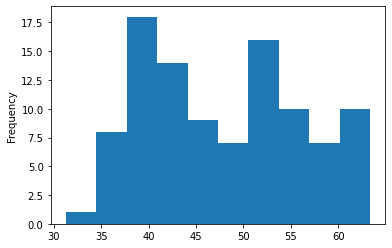

In [94]:
df['Tamaño'].plot.hist()
df

Ordeno el DS de manera ascendente y lo muestro

In [95]:
df.sort_values(['Tamaño'], ignore_index=True, inplace=True)
df

,Tamaño,Naranjas
0,31.280119,0
1,35.456461,0
2,35.697590,0
3,35.699918,0
4,35.790673,0
...,...,...
95,62.225585,1
96,62.667588,1
97,62.724144,1
98,63.136372,1


Defino la funcion para plotear la curva ROC

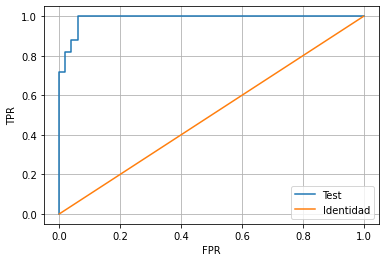

In [96]:
x_list, y_list = ([], [])
x_list.append(0)
y_list.append(0)

x, y = (0, 0)

for i in range(100):
    if df.iloc[i, 1] == 0:
        y += 1/50
    else:
        x += 1/50
    x_list.append(x)
    y_list.append(y)


plt.figure()
plt.plot(x_list, y_list, [0,1], [0,1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend(['Test', 'Identidad'])

Agrego al dataset las predicciones

In [97]:
df=df.assign(Prediccion = 0)
dist = np.sqrt(np.abs(np.array(x_list)-((np.array(x_list)+np.array(y_list))/2))+np.abs(np.array(y_list)-((np.array(x_list)+np.array(y_list))/2)))
[pos_umbral] =np.where(dist == dist.max())
pos_umbral = pos_umbral[-1] 


Umbral = df.iloc[pos_umbral,0]


df['Prediccion'] = [0 if df.iloc[i,0] < Umbral else 1 for i in range(100)]
df


,Tamaño,Naranjas,Prediccion
0,31.280119,0,0
1,35.456461,0,0
2,35.697590,0,0
3,35.699918,0,0
4,35.790673,0,0
...,...,...,...
95,62.225585,1,1
96,62.667588,1,1
97,62.724144,1,1
98,63.136372,1,1


Agrego al dataset los tipos de errores

In [103]:
df['Tipo_de_error']     =  ['FP' if df.iloc[i,1]==0 and df.iloc[i,2]==1 else 
                            'FN' if df.iloc[i,1]==1 and df.iloc[i,2]==0 else 
                            'VN' if df.iloc[i,1]==0 and df.iloc[i,2]==0 else
                            'VP' for i in range(100)]
df.sample(10)

,Tamaño,Naranjas,Prediccion,Tipo_de_error
82,56.936617,1,1,VP
58,50.573682,1,1,VP
63,51.617460,1,1,VP
36,42.328373,1,0,FN
2,35.697590,0,0,VN
53,48.575303,1,1,VP
32,41.790146,0,0,VN
38,43.161755,0,0,VN
51,48.289290,0,0,VN
85,58.574022,1,1,VP


Calculo parametros de calidad

In [100]:
fp, fn, vp, vn = [np.sum(df['Tipo_de_error'] == TdE) for TdE in ['FP', 'FN', 'VP', 'VN']]

TPR = vp/(vp+fn)
FPR = fp/(fp+vn)
PPV = vp/(vp+fp)  
f_score = (2*TPR*PPV)/(TPR+PPV)

print('Recall:', TPR)
print('Tasa de Falsos positivos:', FPR)
print('Precision:', PPV)  
print('F-score:', f_score)


Recall: 0.94
Tasa de Falsos positivos: 0.0
Precision: 1.0
F-score: 0.9690721649484536


3

Conclusiones: Probe con 2 medias para cada conjunto. En el primer caso, la media de las Naranjas fue de 55 y la media de las Mandarinas de 40. Los resultados obtenidos fueron los sig: 



*   Recall: 0.94

*   Tasa de Falsos positivos: 0

*   Precision: 1


*   F-score: 0.969











En el segundo caso, junte mas las medias para que se superpongan los conjuntos. La media de las Naranjas fue 50 y la de las Mandarinaas 45. Obteniendo:

*   Recall: 0.62

*   Tasa de Falsos positivos: 0.18

*   Precision: 0.775


*   F-score: 0.689


Como era de esperar, los resultados del segundo caso fueron peores ya que el umbral esta en el medio de ambas distribuciones.